<a href="https://colab.research.google.com/github/malh718/datasci_3_eda/blob/main/HHA507HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro



df = pd.read_csv('Birth_Stat.csv')
df


,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area
0,1,60002,0.084837,0.134124,18.5,10.440239,74.639700,215525.155184,-1.149062e+09
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08
2,3,60015,0.095519,0.101959,1.8,7.635261,83.544132,111400.890558,-3.674576e+08
3,4,60020,0.077067,0.087777,29.9,13.737068,79.075398,92363.084625,-1.666177e+08
4,5,60030,0.071311,0.086675,6.2,10.598146,81.745316,247258.224672,-8.455179e+08
5,6,60031,0.081407,0.098994,10.1,10.265032,78.372131,163995.181561,-5.271176e+08
6,7,60035,0.067941,0.088888,3.6,8.161008,84.821850,115796.723820,-3.457929e+08
7,8,60040,0.081060,0.116597,21.7,14.259259,81.801379,25907.372467,-1.780943e+07
8,9,60042,0.057217,0.103992,5.2,5.142590,74.762789,45385.395226,-4.517757e+07
9,10,60044,0.045741,0.077593,4.8,8.494268,84.421498,92539.708731,-2.127777e+08


In [146]:
df.sample(10)


,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08
18,19,60073,0.064898,0.092917,42.9,17.024766,74.793289,209118.936758,-5.196587e+08
14,15,60060,0.073594,0.096260,20.6,13.367328,78.087837,180171.962436,-6.175913e+08
17,18,60069,0.057701,0.081997,4.3,5.300566,82.899794,146555.427438,-1.700669e+08
8,9,60042,0.057217,0.103992,5.2,5.142590,74.762789,45385.395226,-4.517757e+07
22,23,60087,0.077744,0.089882,52.7,14.863123,67.712427,163122.611793,-3.898800e+08
0,1,60002,0.084837,0.134124,18.5,10.440239,74.639700,215525.155184,-1.149062e+09
9,10,60044,0.045741,0.077593,4.8,8.494268,84.421498,92539.708731,-2.127777e+08
26,27,60041,0.044966,0.109026,12.3,11.987291,72.736204,152724.616883,-3.919550e+08
19,20,60083,0.085447,0.115101,14.7,9.439414,80.726607,164753.217612,-7.282379e+08


In [26]:
df['OBJECTID'].nunique()

27

In [127]:
df.columns


Index(['OBJECTID', 'ZIP', 'LBW', 'Preterm', 'TeenBirth', 'Birth_Rate',
       'F1stTriCare', 'SHAPE_Length', 'SHAPE_Area'],
      dtype='object')

In [128]:
df.dtypes

OBJECTID          int64
ZIP               int64
LBW             float64
Preterm         float64
TeenBirth       float64
Birth_Rate       object
F1stTriCare     float64
SHAPE_Length    float64
SHAPE_Area      float64
dtype: object

In [36]:
df.ZIP.describe()

count       27.000000
mean     60053.555556
std         27.169459
min      60002.000000
25%      60037.500000
50%      60047.000000
75%      60078.000000
max      60099.000000
Name: ZIP, dtype: float64

In [37]:
temp = df.groupby('Preterm').ZIP.describe()
temp.to_csv('tb.csv')


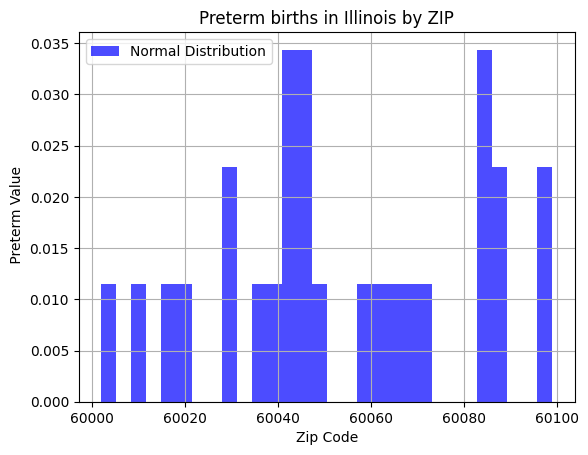

In [42]:
plt.hist(df['ZIP'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Preterm births in Illinois by ZIP')
plt.xlabel('Zip Code')
plt.ylabel(' Preterm Value')
plt.legend()
plt.grid(True)
plt.show()


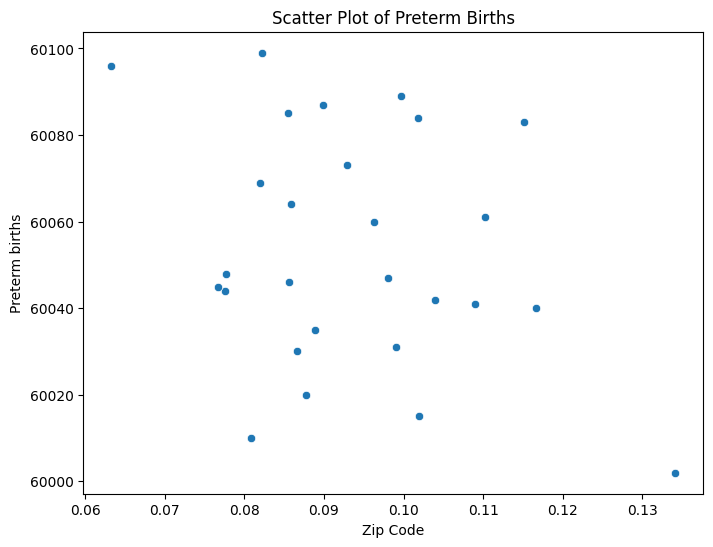

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=(df['Preterm']), y=(df['ZIP']))
plt.xlabel("Zip Code")
plt.ylabel("Preterm births")
plt.title("Scatter Plot of Preterm Births")
plt.show()

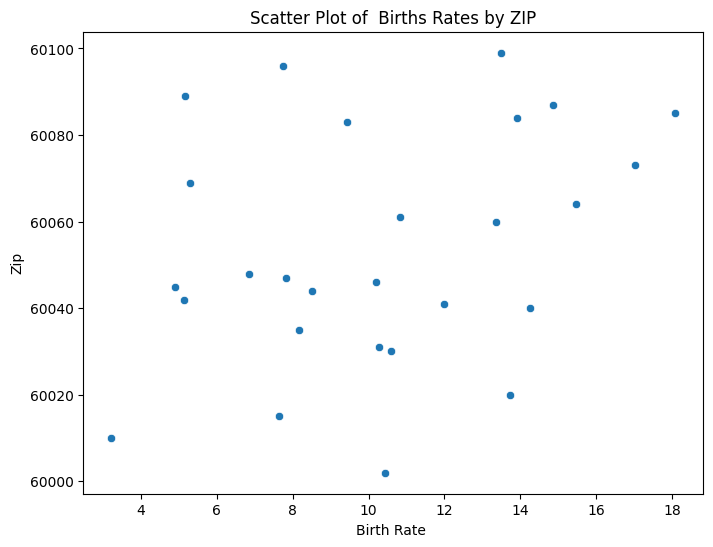

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=(df['Birth_Rate']), y=(df['ZIP']))
plt.xlabel("Birth Rate ")
plt.ylabel("Zip")
plt.title("Scatter Plot of  Births Rates by ZIP")
plt.show()
